In [5]:
%pip install torch
%pip install torchvision
%pip install matplotlib

  Using cached torch-2.7.1-cp311-cp311-win_amd64.whl (216.1 MB)
  Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
  Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl (199 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: d:\workspace\PyTorch\Fashion_MNIST\venv\Scripts\python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.7/1.7 MB 13.6 MB/s eta 0:00:00
     --------------------------------------- 13.0/13.0 MB 29.7 MB/s eta 0:00:00
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl (2.7 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: d:\workspace\PyTorch\Fashion_MNIST\venv\Scripts\python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: d:\workspace\PyTorch\Fashion_MNIST\venv\Scripts\python.exe -m pip install --upgrade pip


In [6]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [7]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [8]:
IMAGE_SIZE = 16

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [9]:


transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [10]:
# Enter your code here
dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

100.0%
100.0%
100.0%
100.0%


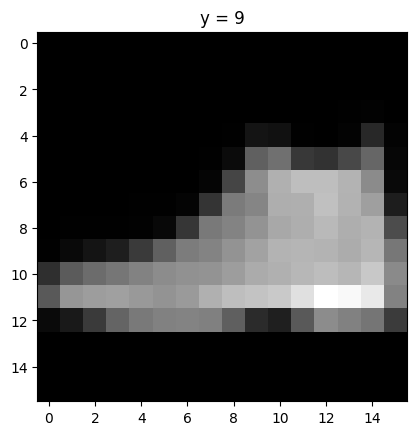

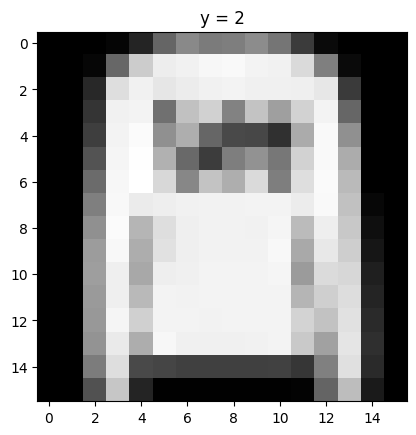

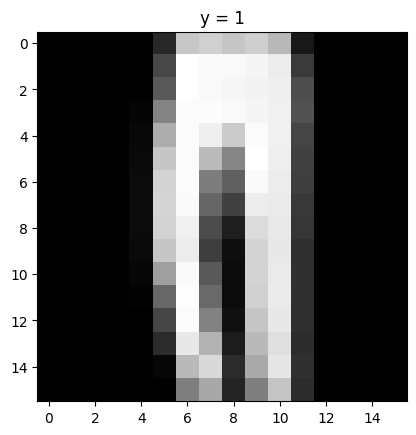

In [11]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

In [13]:
class CNN_batch(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [14]:
class CNN(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [16]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
model_batch =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

In [17]:
# Enter your code here
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
optimizer_batch = torch.optim.SGD(params=model_batch.parameters(), lr=0.1)

In [ ]:
import time
def train(model, optimizer):
    start_time = time.time()

    cost_list=[]
    accuracy_list=[]
    N_test=len(dataset_val)
    n_epochs=10
    for epoch in range(n_epochs):
        cost=0
        model.train()
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            cost+=loss.item()
        correct=0
        #perform a prediction on the validation  data 
        model.eval()
        for x_test, y_test in test_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        cost_list.append(cost)
    end_time = time.time()
    print(f'Total accumulated training time: {(end_time-start_time):.2f} seconds.')
    return cost_list, accuracy_list

In [19]:
cost_list, acc_list = train(model, optimizer)
cost_list_batch, acc_list_batch = train(model_batch, optimizer_batch)

Total accumulated training time: 214.71532320976257
Total accumulated training time: 232.27174162864685


In [20]:
def plot(cost_list, accuracy_list):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(cost_list, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('Cost', color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color) 
    ax2.set_xlabel('epoch', color=color)
    ax2.plot( accuracy_list, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()

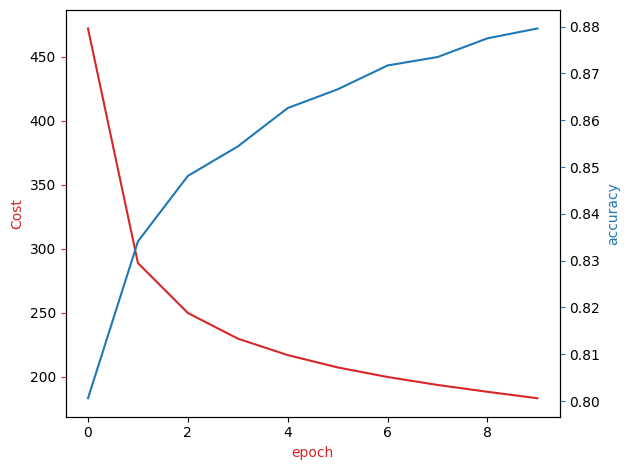

In [21]:
plot(cost_list, acc_list)

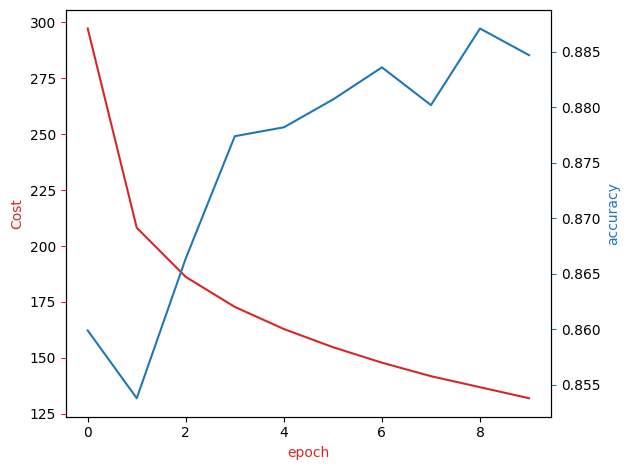

In [22]:
plot(cost_list_batch, acc_list_batch)

dataset: https://github.com/zalandoresearch/fashion-mnist
